In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, VGG16, ResNet50
from tensorflow.keras.utils import plot_model

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
from tensorflow.keras import layers

def CNN_LBP_Model(input_shape, num_classes):
    model = tf.keras.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten the output
    model.add(layers.Flatten())

    # LBP layer
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Fully connected layers
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [5]:
def alex_net():
  model = Sequential()

  # Add the convolutional layers
  model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
  model.add(MaxPooling2D((3, 3), strides=(2, 2)))
  model.add(Conv2D(256, (5, 5), strides=(1, 1), activation='relu', padding='same'))
  model.add(MaxPooling2D((3, 3), strides=(2, 2)))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
  model.add(Conv2D(384, (3, 3), strides=(1, 1), activation='relu', padding='same'))
  model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding='same'))
  model.add(MaxPooling2D((3, 3), strides=(2, 2)))

  # Flatten the output and add the fully connected layers
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1000, activation='softmax'))

  # Print the model summary
  model.summary()
  return model

In [7]:
vgg16 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Models/vgg16_patched128_1.h5')
vgg16._name = 'vgg16'
vgg19 = tf.keras.models.load_model('/content/drive/MyDrive/ColaLeaf Disease/Models/VGG19_patched128_Training.h5')
vgg19._name = 'vgg19'
resnet50_model = tf.keras.models.load_model('/content/drive/MyDrive/Leaf Disease/2_Resnet_new_ 50.h5')
cnn_lbp = tf.keras.models.load_model('/content/drive/MyDrive/Leaf Disease/Models/cnn_lbp_128patch_1_an.h5')
alex_net = tf.keras.models.load_model('/content/drive/MyDrive/Leaf Disease/Alexnet_new.h5')

OSError: ignored

In [6]:
vgg16.summary()

NameError: ignored

In [ ]:
from keras.models import Model
from keras.layers import concatenate

In [ ]:
# resnet50_model= tf.keras.Sequential([
# #     resnet50_model,           # Include the ResNet-50 model
# #     Flatten(),               # Flatten the output of ResNet-50
# #     Dense(256, activation='relu'),  # Add a dense layer with desired dimensions
# # ])

# # vgg16= tf.keras.Sequential([
# #     resnet50_model,           # Include the ResNet-50 model
# #     Flatten(),               # Flatten the output of ResNet-50
# #     Dense(1000, activation='relu'),  # Add a dense layer with desired dimensions
# # ])

# # vgg19= tf.keras.Sequential([
# #     vgg19,           # Include the ResNet-50 model
# #     Flatten(),               # Flatten the output of ResNet-50
# #     Dense(1000, activation='relu'),  # Add a dense layer with desired dimensions
# # ])

In [ ]:
for layer in vgg16.layers:
    layer.trainable = False
for layer in vgg19.layers:
    layer.trainable = False
for layer in resnet50_model.layers:
    layer.trainable = False

In [ ]:
tf.keras.backend.reset_uids()

In [ ]:
for layer in resnet50_model.layers:
  layer._name = layer._name + str('_resnet')
for layer in vgg16.layers:
  layer._name = layer._name + str('_vgg16')
for layer in vgg19.layers:
  layer._name = layer._name + str('_vgg19')
for layer in cnn_lbp.layers:
  layer._name = layer._name + str('_cnnlbp')
for layer in alex_net.layers:
  layer._name = layer._name + str('_alex_net')

In [ ]:
# layer_names = {}

# # Iterate through the layers and check for duplicates
# for layer in vgg19.layers:
#     if layer.name in layer_names:
#         print(f"Duplicate layer name found: {layer.name}")
#     else:
#         layer_names[layer.name] = 1

In [ ]:
inp = tf.keras.layers.Input(shape=(224,224,3),name='Input')

vgg16_out = vgg16(inp)
vgg19_out = vgg19(inp)
resnet50_out = resnet50_model(inp)
cnn_lbp_out = cnn_lbp(inp)
alex_net_out = alex_net(inp)

In [ ]:
vgg1619out = concatenate([vgg16_out,vgg19_out],name = 'concatvgg1916')
resnetcnnout = concatenate([resnet50_out,cnn_lbp_out])
# resnetcnn = Model(inp,resnetcnnout)
# vgg1619 = Model(inputs = inp,outputs =vgg1619out)


In [ ]:
vggresnetout = concatenate([vgg1619out,resnetcnnout])
#vggresnet = Model(inp,vggresnetout)

In [ ]:
vggresnetalexout = concatenate([vggresnetout,alex_net_out])
#vggresnetalex = Model([vggresnet.input,alex_net.input],vggresnetalexout)
vggresnetalex = Model(inp,vggresnetalexout)

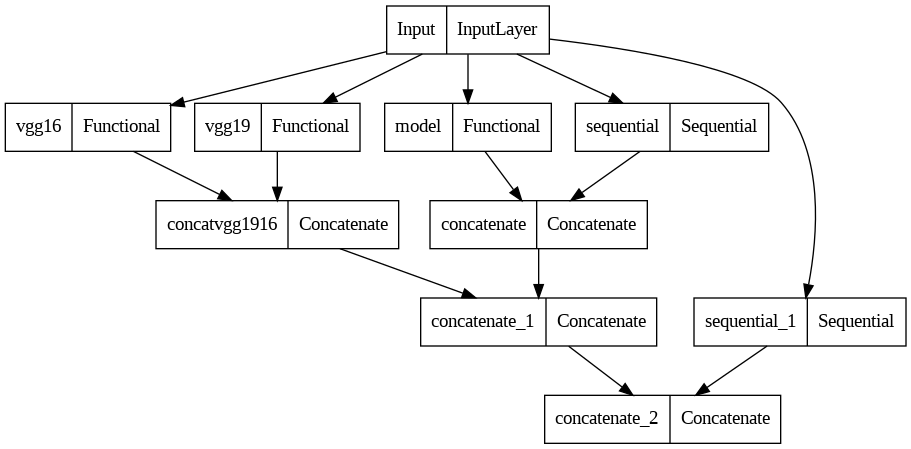

In [ ]:
plot_model(vggresnetalex)

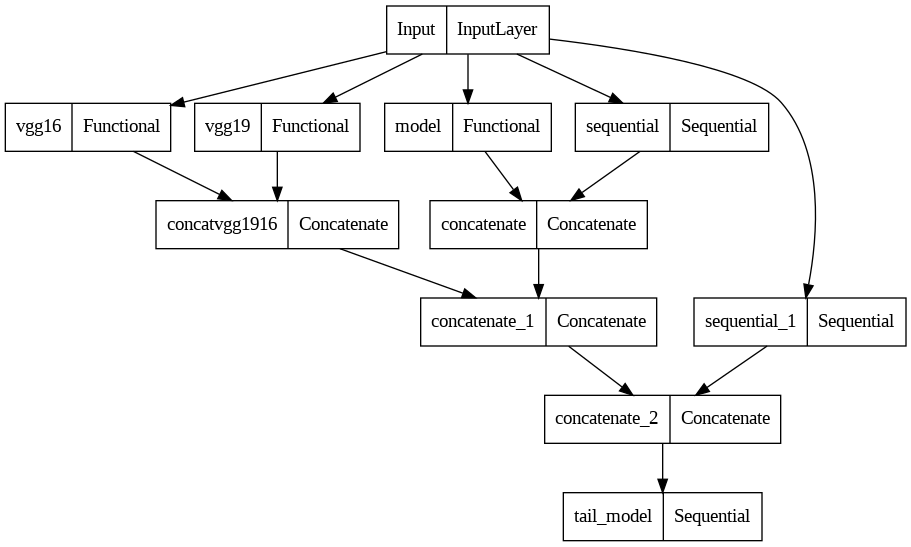

In [ ]:
Tailing_model = Sequential()

Tailing_model.add(Dense(1000, activation='relu',name = 'dense_tail1'))
Tailing_model.add(Dense(10, activation='relu',name = 'dense_tail2'))
Tailing_model._name = "tail_model"
ensembled_model = Model(inputs=vggresnetalex.input, outputs=Tailing_model(vggresnetalex.output))
plot_model(ensembled_model)

In [ ]:
ensembled_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# ensembled_model.save('/content/drive/MyDrive/Leaf Disease/Models/vggresnetalex_trained_model.tf',save_format = 'tf')

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [ ]:
test_data_dir = '/content/drive/MyDrive/Leaf Disease/Tomato_test'
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # adjust the target size as per your model's input size
    batch_size=32,
    class_mode='categorical',  # set this to 'binary' for binary classification
    shuffle=False  # Important: set to False to ensure predictions are ordered
)

Found 2295 images belonging to 10 classes.


In [ ]:
# Make predictions using the loaded model
y_true = test_generator.classes
y_pred_probs = ensembled_model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

72/72 [==============================] - 2516s 35s/step


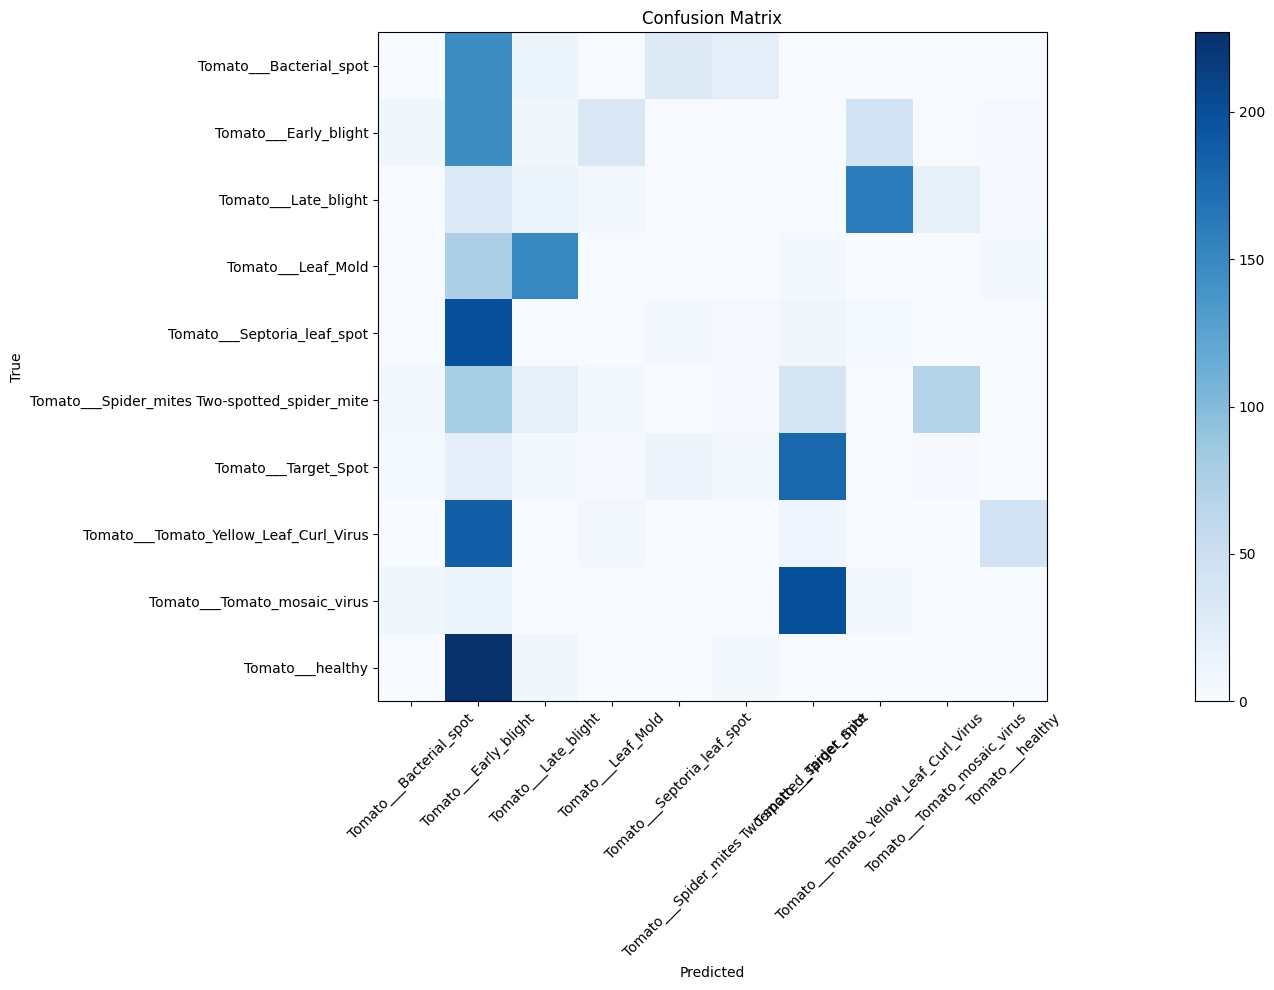

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(30, 10))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

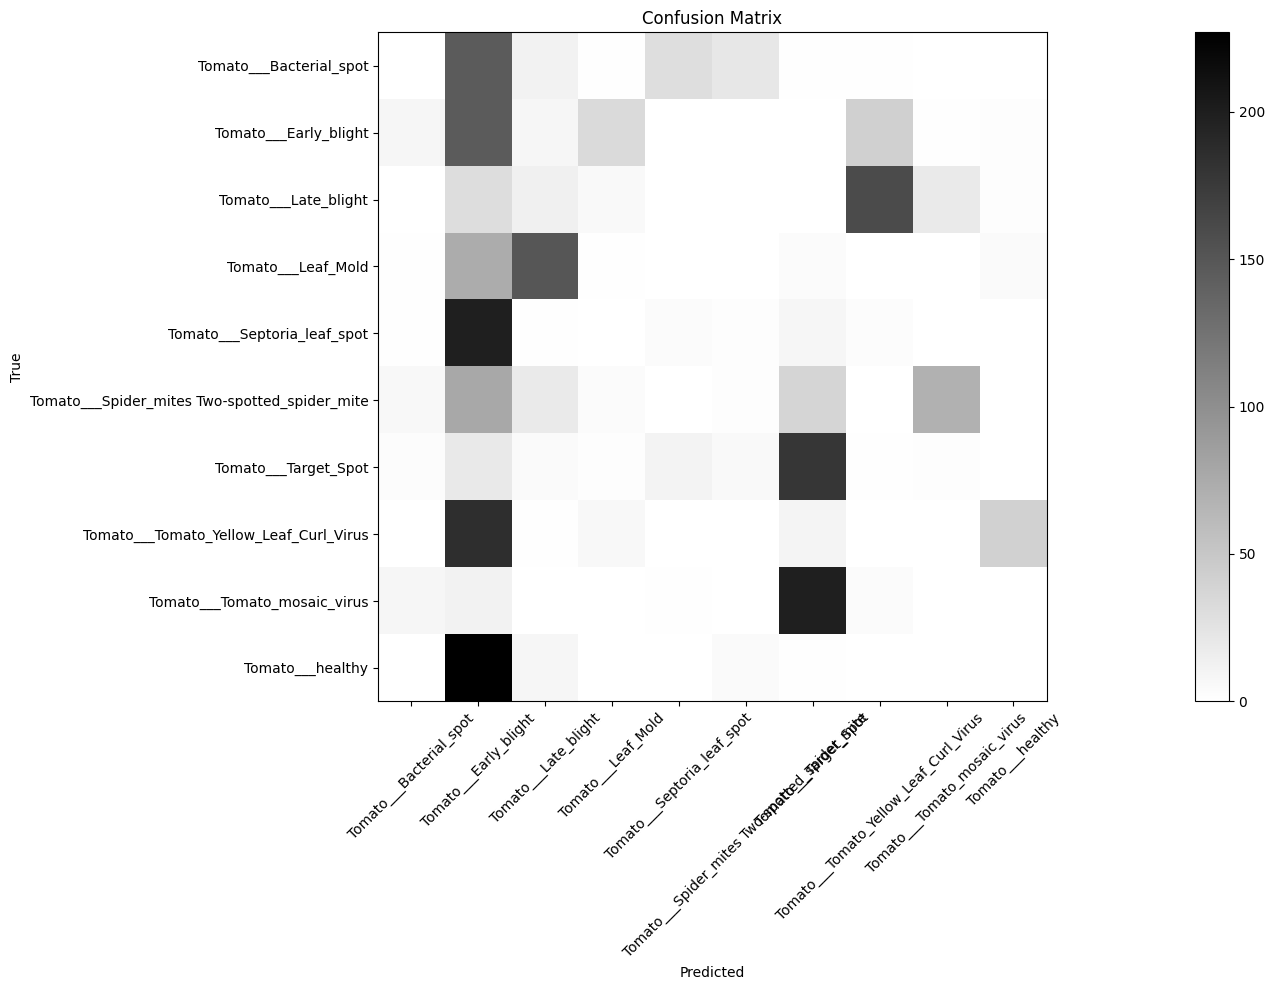

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.00      0.00      0.00       213
                        Tomato___Early_blight       0.13      0.61      0.21       240
                         Tomato___Late_blight       0.06      0.06      0.06       232
                           Tomato___Leaf_Mold       0.02      0.00      0.01       235
                  Tomato___Septoria_leaf_spot       0.09      0.02      0.03       218
Tomato___Spider_mites Two-spotted_spider_mite       0.05      0.01      0.02       218
                         Tomato___Target_Spot       0.41      0.78      0.54       229
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.00      0.00      0.00       245
                 Tomato___Tomato_mosaic_virus       0.00      0.00      0.00       224
                             Tomato___healthy       0.00      0.00      0.00       241

                                     accu

In [ ]:
# Visualize the confusion matrix in black and white
plt.figure(figsize=(30, 10))
plt.imshow(confusion_mtx, interpolation='nearest', cmap='binary')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices, rotation=45)
plt.yticks(tick_marks, test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# You can also print a classification report for more details
class_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

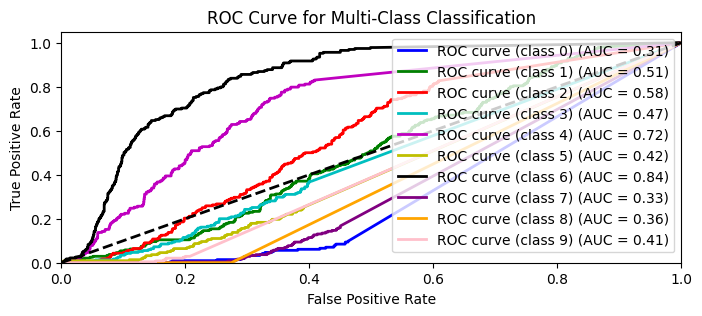

In [ ]:
# # Step 1: Get predicted probabilities for each class
# y_pred_probs = model.predict(test_generator)

# Step 2: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming you have 10 classes
n_classes = 10

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_generator.classes == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot ROC curves
plt.figure(figsize=(8, 3))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'pink']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')



plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='best')
plt.show()



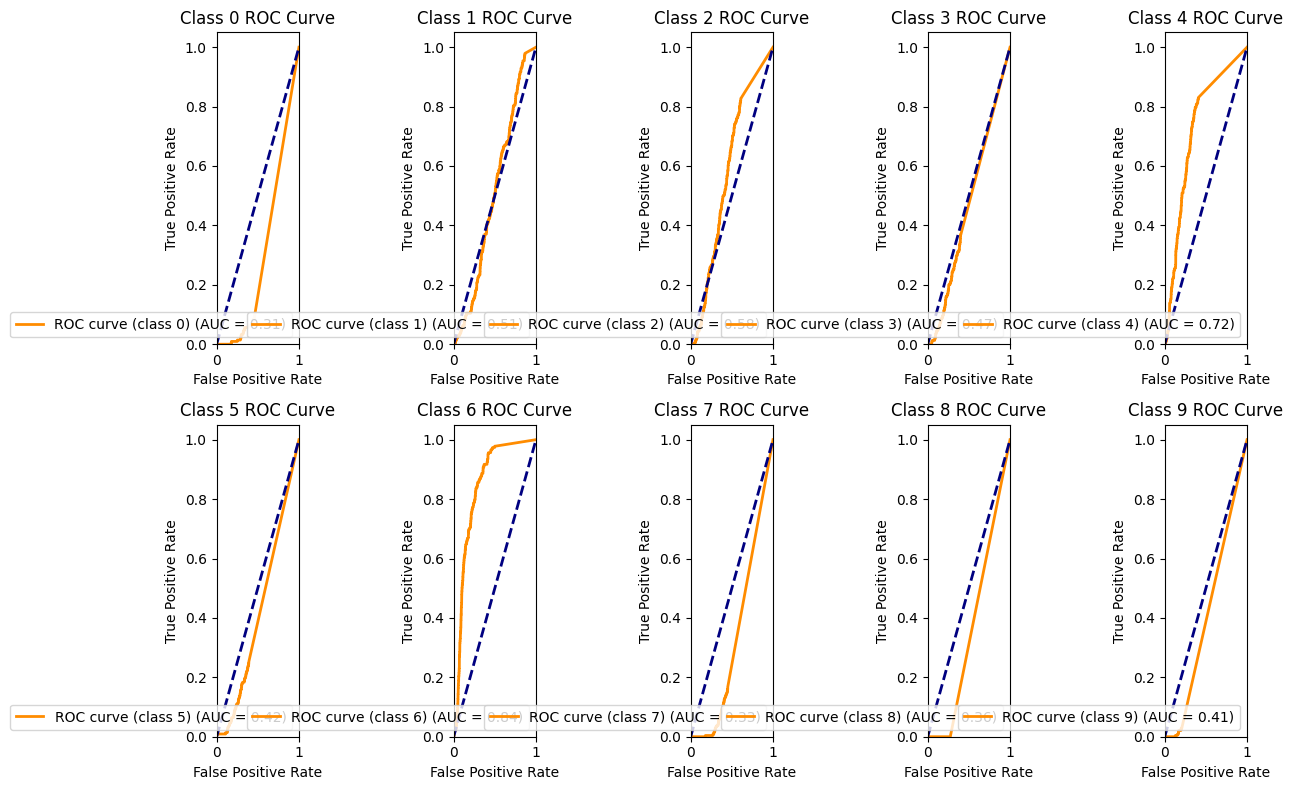

In [ ]:
# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=5)

for i in range(n_classes):
    row = i // 5
    col = i % 5

    fpr[i], tpr[i], _ = roc_curve(test_generator.classes == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    ax[row, col].plot(fpr[i], tpr[i], color='darkorange', lw=2,
                      label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
    ax[row, col].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[row, col].set_xlim([0.0, 1.0])
    ax[row, col].set_ylim([0.0, 1.05])
    ax[row, col].set_xlabel('False Positive Rate')
    ax[row, col].set_ylabel('True Positive Rate')
    ax[row, col].set_title(f'Class {i} ROC Curve')
    ax[row, col].legend(loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()

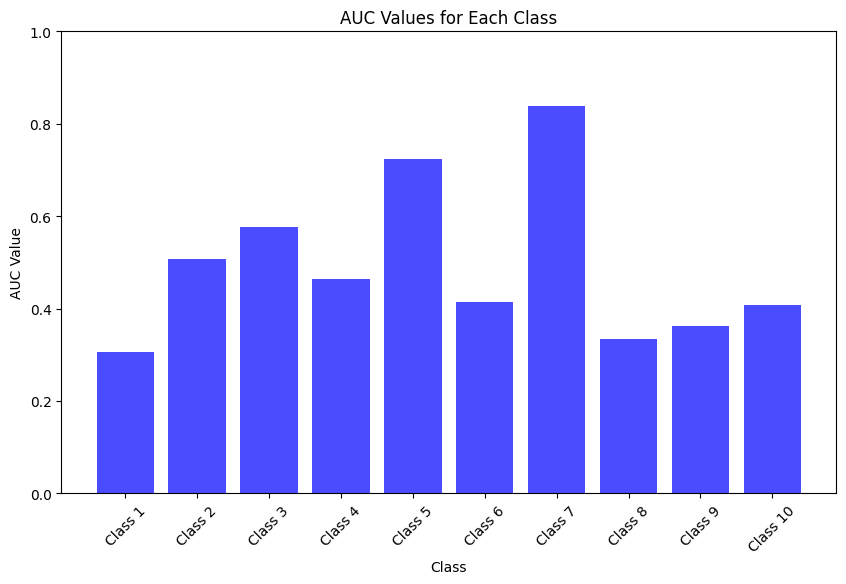

In [ ]:
# Step 2: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming you have 10 classes
n_classes = 10

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_generator.classes == i, y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot AUC values for each class
class_names = [f'Class {i+1}' for i in range(n_classes)]
auc_values = [roc_auc[i] for i in range(n_classes)]

plt.figure(figsize=(10, 6))
plt.bar(class_names, auc_values, color='b', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('AUC Value')
plt.title('AUC Values for Each Class')
plt.ylim([0.0, 1.0])
plt.xticks(rotation=45)
plt.show()

In [ ]:
ensembled_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 10)                   2114004   ['Input[0][0]']               
                                                          2                                       
                                                                                                  
 vgg19 (Functional)          (None, 10)                   2644973   ['Input[0][0]']               
                                                          8                                       
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import Adam

vggresnetalex.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define data augmentation for validation/testing
val_datagen = ImageDataGenerator(rescale=1./255)

# Load your dataset (replace 'train_dir' and 'val_dir' with your dataset directories)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Leaf Disease/Tomato_Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Leaf Disease/Tomato_test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 8950 images belonging to 10 classes.
Found 2295 images belonging to 10 classes.
